In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
scores = np.array([3.0, 1.0, 0.2])

If you increase the size of your outputs, the model becomes very confident about predictions
 scores x 10

If you reduce the size of your outputs, the model becomes very unsure
 scores / 10

We want it to be unsure in the beginning and become more confident as it learns

In [18]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    #pass  # TODO: Compute and return softmax(x)
    e_x = np.exp(x)
    sum_e_x = np.sum(e_x, axis = 0)
    #return np.exp(x) / np.sum(np.exp(x), axis = 0)
    return e_x / sum_e_x
    

In [19]:
print(softmax(scores))

[ 0.8360188   0.11314284  0.05083836]


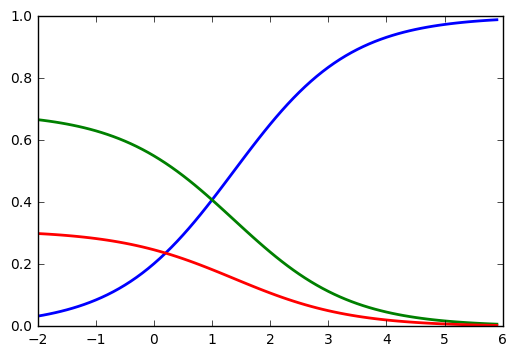

In [20]:
# Plot softmax curves
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()


If you multiply these by 10, their probabilities get super close to 1 or 0
mult = np.multiply(np.array(scores),10)
print(softmax(mult))

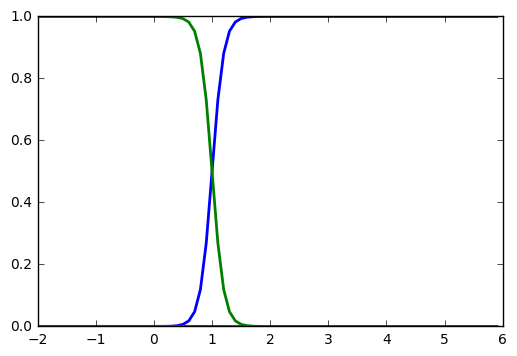

In [21]:
# Plot softmax curves
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores * 10).T, linewidth=2)
plt.show()

If you divide them by 10
div = np.divide(np.array(scores),10)
print(softmax(div))

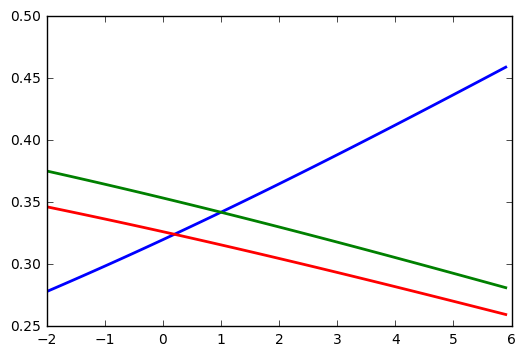

In [22]:
# Plot softmax curves
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores / 10).T, linewidth=2)
plt.show()

So we wanted our probabilities for the correct class to be close to one (like 0.7)
 and all of the others to be close to zero (like 0.2 and 0.1)

We can create a vector as long as there are classes with 1.0 for the correct class and zero
 for everything else.  This is one-hot encoding.

For classes a, b, c, d
The vectors could be as follows
a [0,0,0,1]
b [0,0,1,0]
c [0,1,0,0]
d [1,0,0,0]

This is useful because then the output of the classifier (the numbers 0.7,0.2,0.1 in this case)
 can be compared to the vector for our labels (the one-hot encoding vector)

The natural distance between the two is called cross-entropy D(S,L), which is not symmetric

So, from start to finish, you have inputs which are put into a linear model
 These outputs are then logits
These logits (like the variable scores above) are used as input for softmax
 The output is S(y) (the 0.7,0.2,0.1 above)
 The distance between these and the 1-hot labels is computed with D(S,L)
As a result, you get the probabilities for your classification
Mathematically D(S(Wx+b),L)

But how do you get your weights, W, and bias term, b, to get the softmax to do what you want it
 to do? i.e. minimizing cross-entropy

One way is to measure that distance averaged over the entire training set for all inputs and
 labels
This is called the training loss
 loss = 1/n * sum(D(S(Wx+b),L))
This loss, or average cross entropy over the training set, is a huge matrix added up into a
 huge sum
So how do we traverse this big loss?  with a familiar loss function: gradient descent
